<p style="font-family: helvetica,arial,sans-serif; font-size:2.0em;color:white; background-color: black;">&emsp;<b>EDA: Compare Pedestrian Traffic before Covid to now</b></p>
    
<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Authored by: </b> Brendan Richards, Barkha Javed</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black; text-align:right"> <b>Duration:</b> 45 mins&emsp;</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Level: </b>Beginner&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Pre-requisite Skills:</b>Python</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Scenario</b>

# Business & Activity 
As a small business owner, I want to understand how covid affected foot traffic, and how long it might take to return to normal. I'd also like deeper insights into how different activities can impact pedestrian traffic.

 Factors impacting traffic include those listed below, we will be examining some of these in depth:
- Seasonality through temperature, severe weather events,  daylight savings, public holidays such as Christmas, school holidays, 
- Time of day, day of week
- Major events such as the AFL, concerts and exhibitions
- Proximity to public transport: Trains / Buses / Trams
- Number of local residences
- Number of people travelling into the CBD
- Covid cases and status
- Other venues in proximity - schools, universities, parks, retail outlets, restaurants, bars, clubs, cinemas

This exploratory data analysis looks at <b><i>Covid impact on foot traffic</i></b>.

## Data Preparation

In [1]:
!pip -q install sodapy
!pip -q install seaborn
!pip -q install pandas
!pip -q install matplotlib
!pip -q install numpy
!pip -q install nbconvert

In [2]:
#load libraries
import pandas as pd
import numpy as np
import requests
import io
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sodapy import Socrata

import warnings
warnings.filterwarnings('ignore')

### Data Acquisition Pedestrian Sensor Locations

In [3]:
#Location data
client = Socrata('data.melbourne.vic.gov.au', '9UAGAvkem9fqXDhBLElapjazL', None)
sensor_data_id = "h57g-5234"
results = client.get(sensor_data_id)
sensor_location = pd.DataFrame.from_records(results)
#sensor_location.head(5)

sensor_location[['latitude', 'longitude']] = sensor_location[['latitude', 'longitude']].astype(float)
sensor_location = sensor_location.drop('location',axis=1)

#View sensor data
sensor_location.info()
sensor_location.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sensor_id           91 non-null     object 
 1   sensor_description  91 non-null     object 
 2   sensor_name         91 non-null     object 
 3   installation_date   91 non-null     object 
 4   status              91 non-null     object 
 5   note                10 non-null     object 
 6   latitude            91 non-null     float64
 7   longitude           91 non-null     float64
 8   direction_1         78 non-null     object 
 9   direction_2         78 non-null     object 
dtypes: float64(2), object(8)
memory usage: 7.2+ KB


,sensor_id,sensor_description,sensor_name,installation_date,status,note,latitude,longitude,direction_1,direction_2
0,16,Australia on Collins,Col270_T,2009-03-30T00:00:00.000,R,Device moved to location ID 53 (22/09/2015),-37.815734,144.965210,NaN,NaN
1,50,Faraday St-Lygon St (West),Lyg309_T,2017-11-30T00:00:00.000,A,NaN,-37.798082,144.967210,South,North
2,73,Bourke St - Spencer St (South),Bou655_T,2020-10-02T00:00:00.000,I,NaN,-37.816957,144.954154,East,West
3,66,State Library - New,QVN_T,2020-04-06T00:00:00.000,A,NaN,-37.810578,144.964443,South,North
4,59,Building 80 RMIT,RMIT_T,2019-02-13T00:00:00.000,A,NaN,-37.808256,144.963049,South,North


### Data Acquisition Pedestrian Foot Traffic

In [4]:
#Uncomment the below to open data source, download sensor data, and store it as a csv locally.
#Function to get Sensor count history data
#def sensor_count():
#     client = Socrata('data.melbourne.vic.gov.au', '9UAGAvkem9fqXDhBLElapjazL', None)
#     sensor_data_id = "b2ak-trbp"
#     results = client.get(sensor_data_id, limit=7000000)
#     df = pd.DataFrame.from_records(results)
#     df = df[['date_time', 'year', 'month', 'mdate', 'day', 'time', 'sensor_id', 'sensor_name', 'hourly_counts']]
#     return df

#sensor_history = sensor_count()
#sensor_history.to_csv('sensor_history.csv', index=False)

sensor_history = pd.read_csv('sensor_history.csv')
sensor_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415574 entries, 0 to 4415573
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date_time      object
 1   year           int64 
 2   month          object
 3   mdate          int64 
 4   day            object
 5   time           int64 
 6   sensor_id      int64 
 7   sensor_name    object
 8   hourly_counts  int64 
dtypes: int64(5), object(4)
memory usage: 303.2+ MB


In [5]:
sensor_history.head(10)

,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604
2,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216
3,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774
5,2019-11-01T17:00:00.000,2019,November,1,Friday,17,29,St Kilda Rd-Alexandra Gardens,644
6,2019-11-01T17:00:00.000,2019,November,1,Friday,17,42,Grattan St-Swanston St (West),453
7,2019-11-01T17:00:00.000,2019,November,1,Friday,17,43,Monash Rd-Swanston St (West),387
8,2019-11-01T17:00:00.000,2019,November,1,Friday,17,44,Tin Alley-Swanston St (West),27
9,2019-11-01T17:00:00.000,2019,November,1,Friday,17,35,Southbank,2691


In [6]:
#Add date column
sensor_history['date'] = pd.to_datetime(sensor_history.date_time).dt.date
sensor_history.head(10)

,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts,date
0,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300,2019-11-01
1,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604,2019-11-01
2,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216,2019-11-01
3,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627,2019-11-01
4,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774,2019-11-01
5,2019-11-01T17:00:00.000,2019,November,1,Friday,17,29,St Kilda Rd-Alexandra Gardens,644,2019-11-01
6,2019-11-01T17:00:00.000,2019,November,1,Friday,17,42,Grattan St-Swanston St (West),453,2019-11-01
7,2019-11-01T17:00:00.000,2019,November,1,Friday,17,43,Monash Rd-Swanston St (West),387,2019-11-01
8,2019-11-01T17:00:00.000,2019,November,1,Friday,17,44,Tin Alley-Swanston St (West),27,2019-11-01
9,2019-11-01T17:00:00.000,2019,November,1,Friday,17,35,Southbank,2691,2019-11-01


In [37]:
# Mesh pedestrian sensor location and foot traffic datasets

#convert sensor_id to integer
sensor_history['sensor_id']=sensor_history['sensor_id'].astype(int)
sensor_location['sensor_id']=sensor_location['sensor_id'].astype(int)

sensor_ds = pd.merge(sensor_history, sensor_location, on='sensor_id')

#Add column
sensor_ds['installation_dt'] = pd.to_datetime(sensor_ds.installation_date).dt.date

#Drop column
sensor_ds = sensor_ds.drop(['installation_date','status','note','sensor_name_x'],axis=1)

sensor_ds.info()
sensor_pre2019 =  sensor_ds.query("year <= 2019")
sensor_post2019 =  sensor_ds.query("year > 2019")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4415574 entries, 0 to 4415573
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date_time           object 
 1   year                int64  
 2   month               object 
 3   mdate               int64  
 4   day                 object 
 5   time                int64  
 6   sensor_id           int32  
 7   hourly_counts       int64  
 8   date                object 
 9   sensor_description  object 
 10  sensor_name_y       object 
 11  latitude            float64
 12  longitude           float64
 13  direction_1         object 
 14  direction_2         object 
 15  installation_dt     object 
dtypes: float64(2), int32(1), int64(4), object(9)
memory usage: 555.9+ MB


In [30]:
sensor_ds.head(10)

,date_time,year,month,mdate,day,time,sensor_id,hourly_counts,date,sensor_description,sensor_name_y,latitude,longitude,direction_1,direction_2,installation_dt
0,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,300,2019-11-01,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
1,2019-11-01T18:00:00.000,2019,November,1,Friday,18,34,240,2019-11-01,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
2,2019-11-01T19:00:00.000,2019,November,1,Friday,19,34,158,2019-11-01,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
3,2019-11-01T20:00:00.000,2019,November,1,Friday,20,34,118,2019-11-01,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
4,2019-11-01T21:00:00.000,2019,November,1,Friday,21,34,131,2019-11-01,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
5,2019-11-01T22:00:00.000,2019,November,1,Friday,22,34,218,2019-11-01,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
6,2019-11-01T23:00:00.000,2019,November,1,Friday,23,34,154,2019-11-01,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
7,2019-11-02T00:00:00.000,2019,November,2,Saturday,0,34,21,2019-11-02,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
8,2019-11-02T01:00:00.000,2019,November,2,Saturday,1,34,21,2019-11-02,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08
9,2019-11-02T02:00:00.000,2019,November,2,Saturday,2,34,4,2019-11-02,Flinders St-Spark La,Fli32_T,-37.81538,144.974151,East,West,2014-06-08


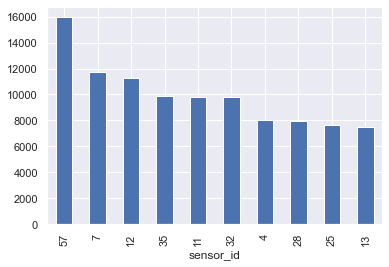

In [38]:
#distribution by traffic, sensors with most traffic - pre 2019
pivot = pd.pivot_table(sensor_pre2019, values='hourly_counts', index=['sensor_id'], aggfunc=np.max)
pivot_ds = pivot['hourly_counts'].nlargest(n=10)
pivot_ds.plot.bar();



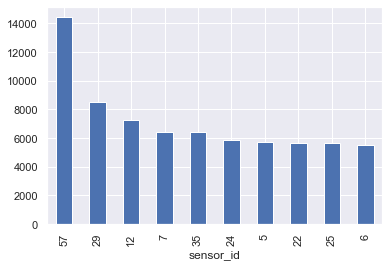

In [39]:
#distribution by traffic, sensors with most traffic - post 2019
pivot = pd.pivot_table(sensor_post2019, values='hourly_counts', index=['sensor_id'], aggfunc=np.max)
pivot_ds = pivot['hourly_counts'].nlargest(n=10)
pivot_ds.plot.bar();


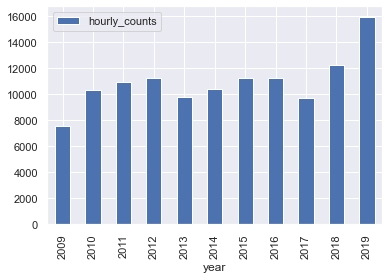

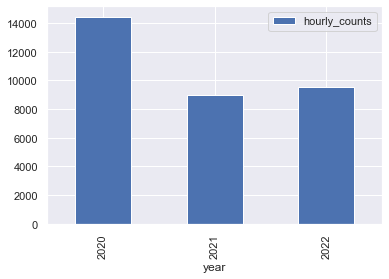

In [40]:
#distribution by traffic
pivot = pd.pivot_table(sensor_pre2019, values=['hourly_counts'], index=['year'], aggfunc=np.max)
pivot.plot.bar();

pivot = pd.pivot_table(sensor_post2019, values='hourly_counts', index=['year'], aggfunc=np.max)
pivot.plot.bar();



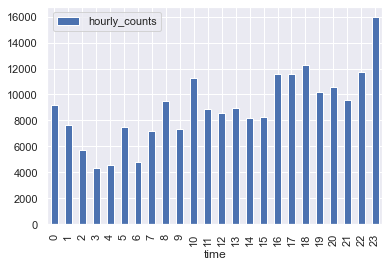

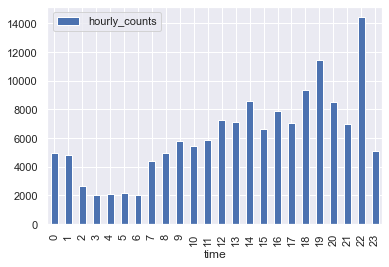

In [41]:
#distribution by traffic - pre 2019
pivot = pd.pivot_table(sensor_pre2019, values='hourly_counts', index=['time'], aggfunc=np.max)
pivot.plot.bar();

#distribution by traffic - post 2019
pivot = pd.pivot_table(sensor_post2019, values='hourly_counts', index=['time'], aggfunc=np.max)
pivot.plot.bar();

### Data Acquisition Covid datasets

In [43]:
#download covid datasets
url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_deaths.csv"
download = requests.get(url).content
df_deaths= pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_state.csv"
download = requests.get(url).content
df_cases= pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_Data_Hub_State.csv"
download = requests.get(url).content
df_hub= pd.read_csv(io.StringIO(download.decode('utf-8')))


#### Deaths in Victoria

          date state  age age_bracket  gender  dd  state_cumulative
11  2020-03-26   VIC  0.0       70-79    Male  70                 1
12  2020-03-26   VIC  0.0       70-79    Male  70                 2
13  2020-03-26   VIC  0.0       70-79    Male  70                 3
16  2020-03-29   VIC  0.0       80-89    Male  80                 4
23  2020-04-02   VIC  0.0       70-79  Female  70                 5 

               age  state_cumulative
count  5133.000000       5133.000000
mean      0.012858       2567.000000
std       0.741955       1481.913796
min       0.000000          1.000000
25%       0.000000       1284.000000
50%       0.000000       2567.000000
75%       0.000000       3850.000000
max      51.000000       5133.000000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5133 entries, 11 to 13116
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5133 non-null   object 
 1   s

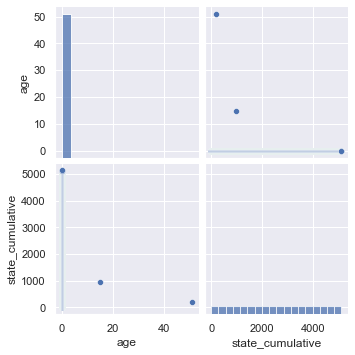

In [44]:
#look at VIC data
options = ['VIC']
  
# selecting rows based on condition
df = df_deaths[df_deaths['state'].isin(options)]
ds1 = df.fillna(0)

print (ds1.head(), '\n')
print (ds1.describe(), '\n')
print (ds1.info())
print("\nTotal number of missing values is","{:,d}".format(ds1.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds1.isnull().sum())
sns.pairplot(ds1)

#### Cases, Vaccines and Deaths  in Victoria

In [45]:
#look at VIC data
options = ['VIC']
  
# selecting rows based on condition
ds = df_cases[df_cases['state_abbrev'].isin(options)]
ds_cases = ds[['date','state_abbrev','confirmed','deaths','positives','vaccines']]


print (ds_cases.head(), '\n')
print (ds_cases.describe(), '\n')
print (ds_cases.info())
print("\nTotal number of missing values is","{:,d}".format(ds_cases.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds_cases.isnull().sum())


          date state_abbrev  confirmed  deaths  positives  vaccines
6   2020-01-25          VIC          1       0          1         0
14  2020-01-26          VIC          0       0          0         0
22  2020-01-27          VIC          0       0          0         0
30  2020-01-28          VIC          0       0          0         0
38  2020-01-29          VIC          2       0          2         0 

           confirmed      deaths      positives       vaccines
count     942.000000  942.000000     942.000000     942.000000
mean     2699.791932    5.449045    2699.791932   17083.459660
std      9276.792803    9.324305    9276.792803   26046.692982
min     -2350.000000    0.000000   -2350.000000  -81162.000000
25%         2.000000    0.000000       2.000000       0.000000
50%        29.000000    0.000000      29.000000    2401.500000
75%      2260.750000    8.000000    2260.750000   24787.500000
max    255050.000000  107.000000  255050.000000  131513.000000 

<class 'pandas.core.f

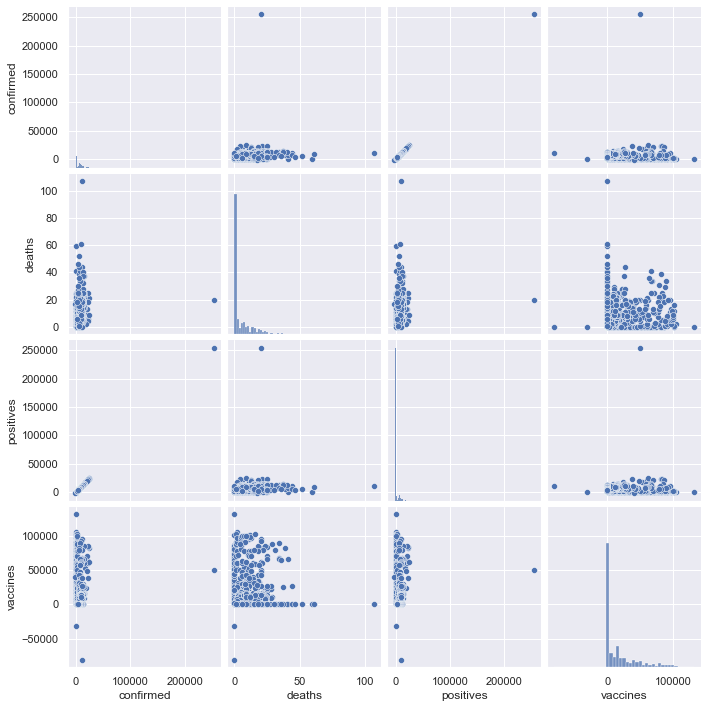

In [46]:
sns.pairplot(ds_cases)

#### Cases, People Vaccinated and Deaths  in Victoria

In [47]:
#look at VIC data
options = ['Victoria']
  
# selecting rows based on condition
ds = df_hub[df_hub['administrative_area_level_2'].isin(options)]
ds_hub = ds[['date','confirmed','deaths','positives','people_vaccinated','people_fully_vaccinated','administrative_area_level_2']]

print (ds_hub.head(), '\n')
print (ds_hub.describe(), '\n')
print (ds_hub.info())
print("\nTotal number of missing values is","{:,d}".format(ds_hub.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds_hub.isnull().sum())


          date  confirmed  deaths  positives  people_vaccinated  \
6   2020-01-25          1       0          0                  0   
14  2020-01-26          1       0          0                  0   
22  2020-01-27          1       0          0                  0   
30  2020-01-28          1       0          0                  0   
38  2020-01-29          3       0          0                  0   

    people_fully_vaccinated administrative_area_level_2  
6                         0                    Victoria  
14                        0                    Victoria  
22                        0                    Victoria  
30                        0                    Victoria  
38                        0                    Victoria   

          confirmed       deaths     positives  people_vaccinated  \
count  9.420000e+02   942.000000  9.420000e+02       9.420000e+02   
mean   4.022693e+05  1257.408705  4.022692e+05       2.122756e+06   
std    7.293854e+05  1236.801846  7.2938

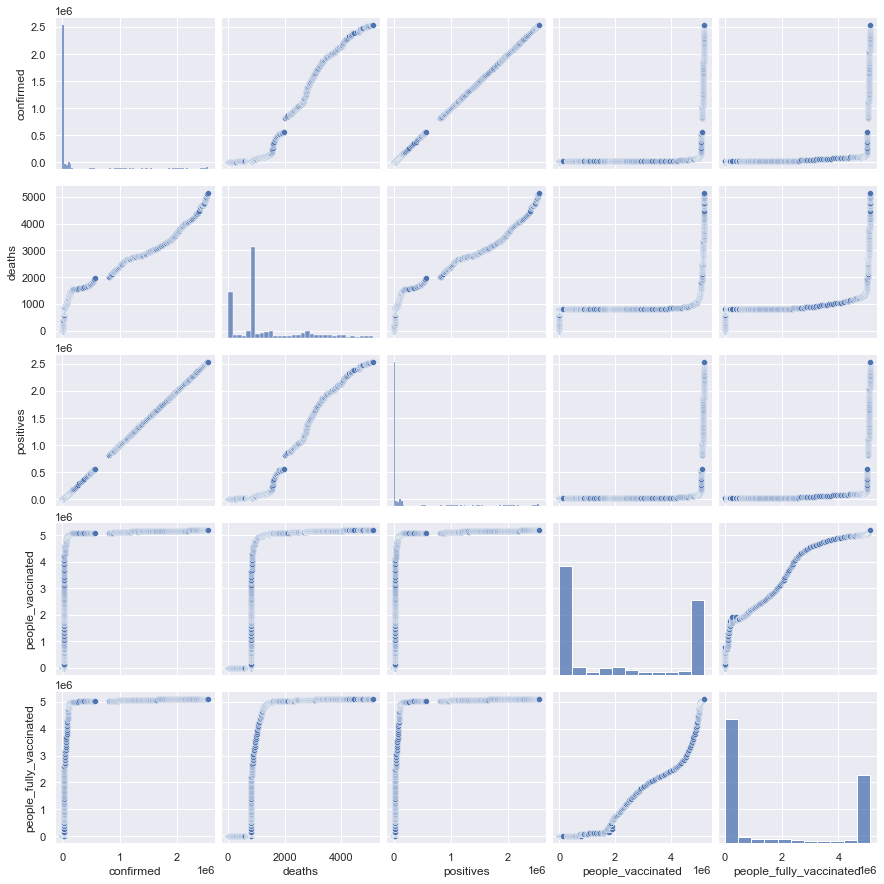

In [48]:
sns.pairplot(ds_hub)

Will examine this Covid dataset in detail, as it has a combination of vaccinated, cases and deaths, by date.

Add extra columns, to examine by year, month and day of week.

In [49]:
#Add day of week, year
ds_hub['date'] = pd.to_datetime(ds_hub['date'], infer_datetime_format=True)
ds_hub['day'] = ds_hub['date'].dt.day_name()
ds_hub['year']= ds_hub['date'].dt.year
ds_hub['dayofyear']= ds_hub['date'].dt.dayofyear
ds_hub['month']= ds_hub['date'].dt.month_name()
ds_hub['mdate']= ds_hub['date'].dt.month

In [50]:
ds_hub.head(10)

,date,confirmed,deaths,positives,people_vaccinated,people_fully_vaccinated,administrative_area_level_2,day,year,dayofyear,month,mdate
6,2020-01-25,1,0,0,0,0,Victoria,Saturday,2020,25,January,1
14,2020-01-26,1,0,0,0,0,Victoria,Sunday,2020,26,January,1
22,2020-01-27,1,0,0,0,0,Victoria,Monday,2020,27,January,1
30,2020-01-28,1,0,0,0,0,Victoria,Tuesday,2020,28,January,1
38,2020-01-29,3,0,0,0,0,Victoria,Wednesday,2020,29,January,1
46,2020-01-30,3,0,0,0,0,Victoria,Thursday,2020,30,January,1
54,2020-01-31,3,0,0,0,0,Victoria,Friday,2020,31,January,1
62,2020-02-01,4,0,0,0,0,Victoria,Saturday,2020,32,February,2
70,2020-02-02,4,0,0,0,0,Victoria,Sunday,2020,33,February,2
78,2020-02-03,4,0,0,0,0,Victoria,Monday,2020,34,February,2


<AxesSubplot:xlabel='year,mdate,month'>

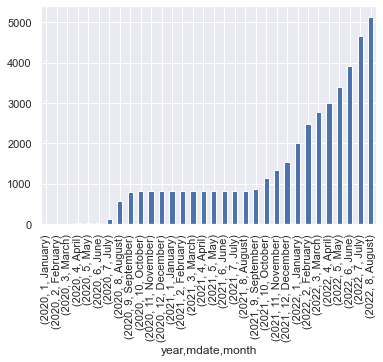

In [51]:
#As cumulative totals by date, use max for aggregation
death_totals = ds_hub.groupby(["year","mdate","month"])["deaths"].max()
death_totals.plot.bar()

<AxesSubplot:xlabel='year,mdate,month'>

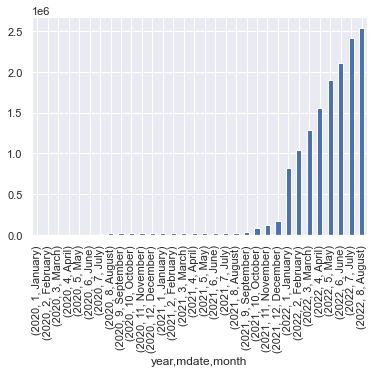

In [52]:
cases_cmax = ds_hub.groupby(["year","mdate","month"])["positives"].max()
cases_cmax.plot.bar()

<AxesSubplot:xlabel='year,mdate,month'>

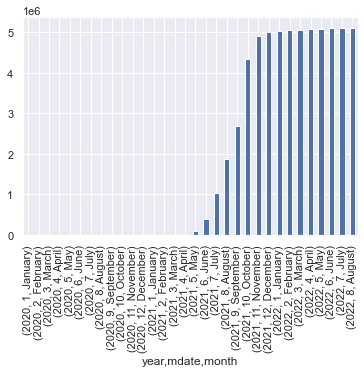

In [53]:
#As cumulative totals by date, use max for aggregation
pfvac_totals = ds_hub.groupby(["year","mdate","month"])["people_fully_vaccinated"].max()
pfvac_totals.plot.bar()

### Merge Foot Traffic and Covid datasets 

In [54]:
#check merge column is of same data type, convert if required
ds_hub.info()
sensor_ds['date'] = pd.to_datetime(sensor_ds['date'])
sensor_ds.info()

# Mesh Covid and foot traffic datasets
sensor_covid = pd.merge(sensor_ds, ds_hub, on='date')

#drop columns
sensor_covid = sensor_covid.drop(['year_x','day_x','month_x','mdate_x','date_time'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 6 to 7534
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         942 non-null    datetime64[ns]
 1   confirmed                    942 non-null    int64         
 2   deaths                       942 non-null    int64         
 3   positives                    942 non-null    int64         
 4   people_vaccinated            942 non-null    int64         
 5   people_fully_vaccinated      942 non-null    int64         
 6   administrative_area_level_2  942 non-null    object        
 7   day                          942 non-null    object        
 8   year                         942 non-null    int64         
 9   dayofyear                    942 non-null    int64         
 10  month                        942 non-null    object        
 11  mdate                        942 non-null   

In [55]:
print (sensor_covid.head(), '\n')
print (sensor_covid.describe(), '\n')
print (sensor_covid.info())
sensor_covid.to_csv('sensor_covid.csv', index=False)

   time  sensor_id  hourly_counts       date    sensor_description  \
0     0         34             62 2020-01-25  Flinders St-Spark La   
1     1         34            187 2020-01-25  Flinders St-Spark La   
2     2         34             13 2020-01-25  Flinders St-Spark La   
3     3         34              8 2020-01-25  Flinders St-Spark La   
4     4         34             11 2020-01-25  Flinders St-Spark La   

  sensor_name_y  latitude   longitude direction_1 direction_2  ... deaths  \
0       Fli32_T -37.81538  144.974151        East        West  ...      0   
1       Fli32_T -37.81538  144.974151        East        West  ...      0   
2       Fli32_T -37.81538  144.974151        East        West  ...      0   
3       Fli32_T -37.81538  144.974151        East        West  ...      0   
4       Fli32_T -37.81538  144.974151        East        West  ...      0   

   positives  people_vaccinated  people_fully_vaccinated  \
0          0                  0                        0

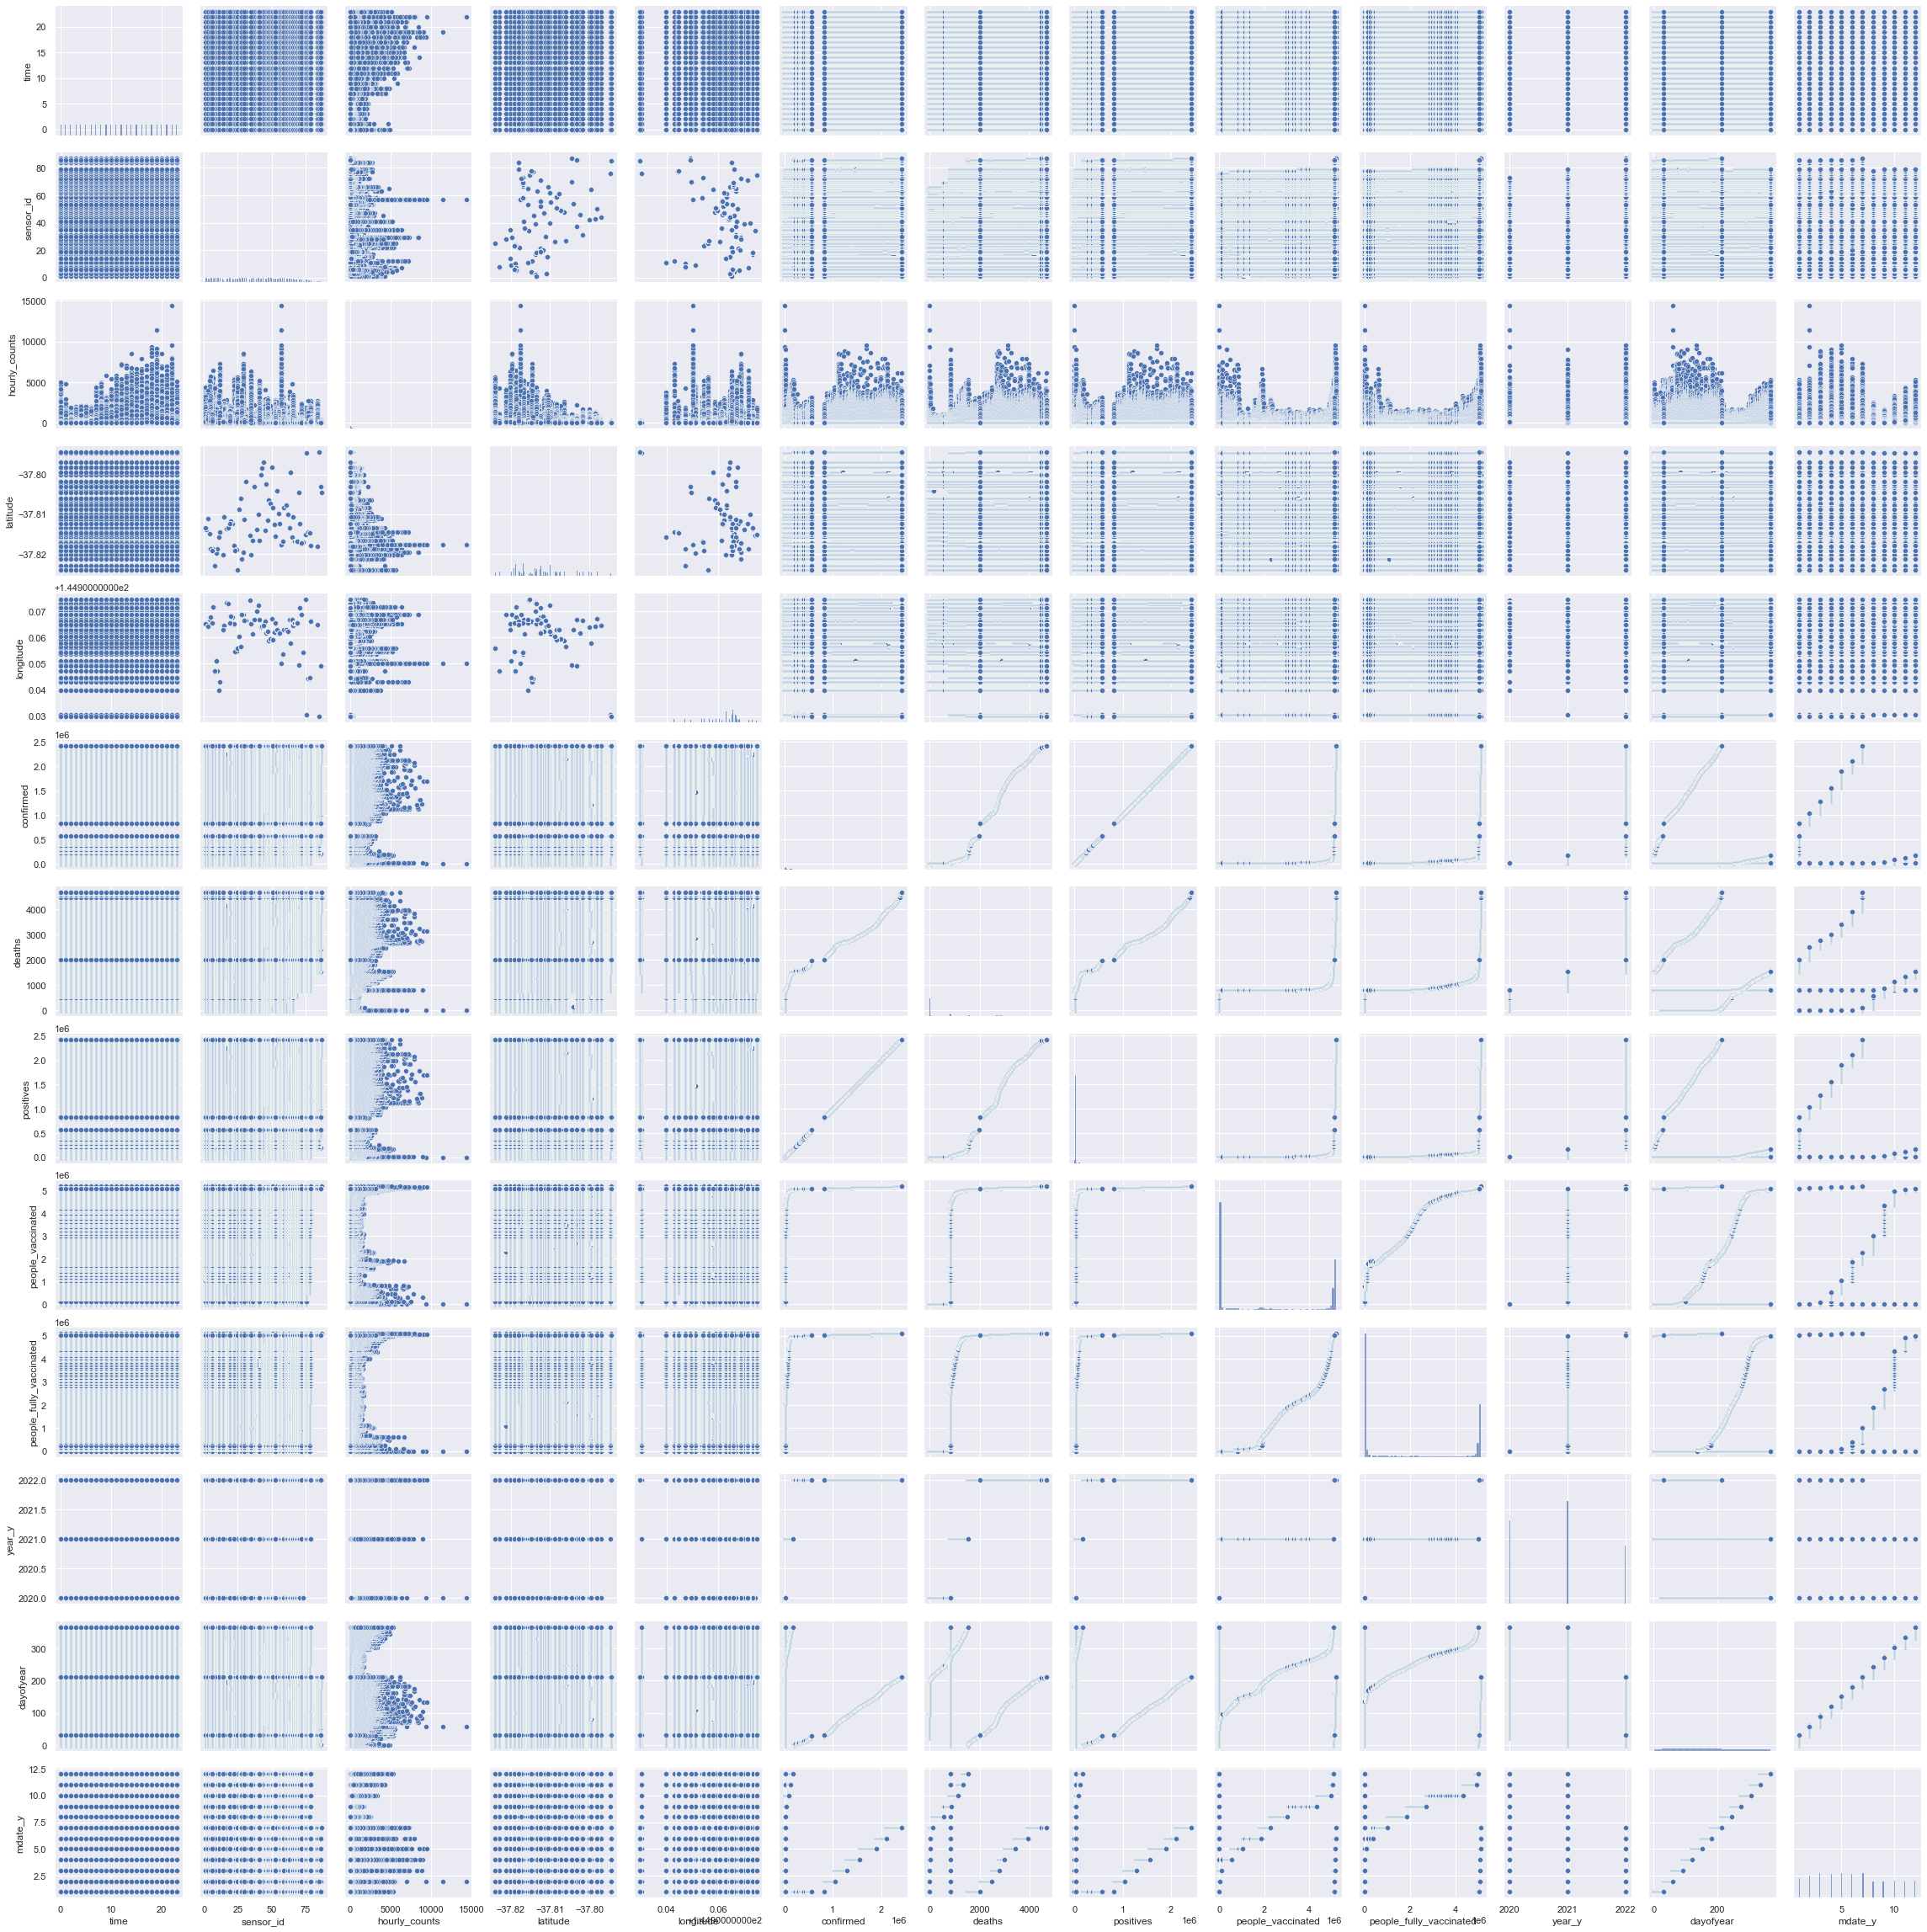

In [56]:
# Examine
sns.pairplot(sensor_covid)

### Identify areas of interest

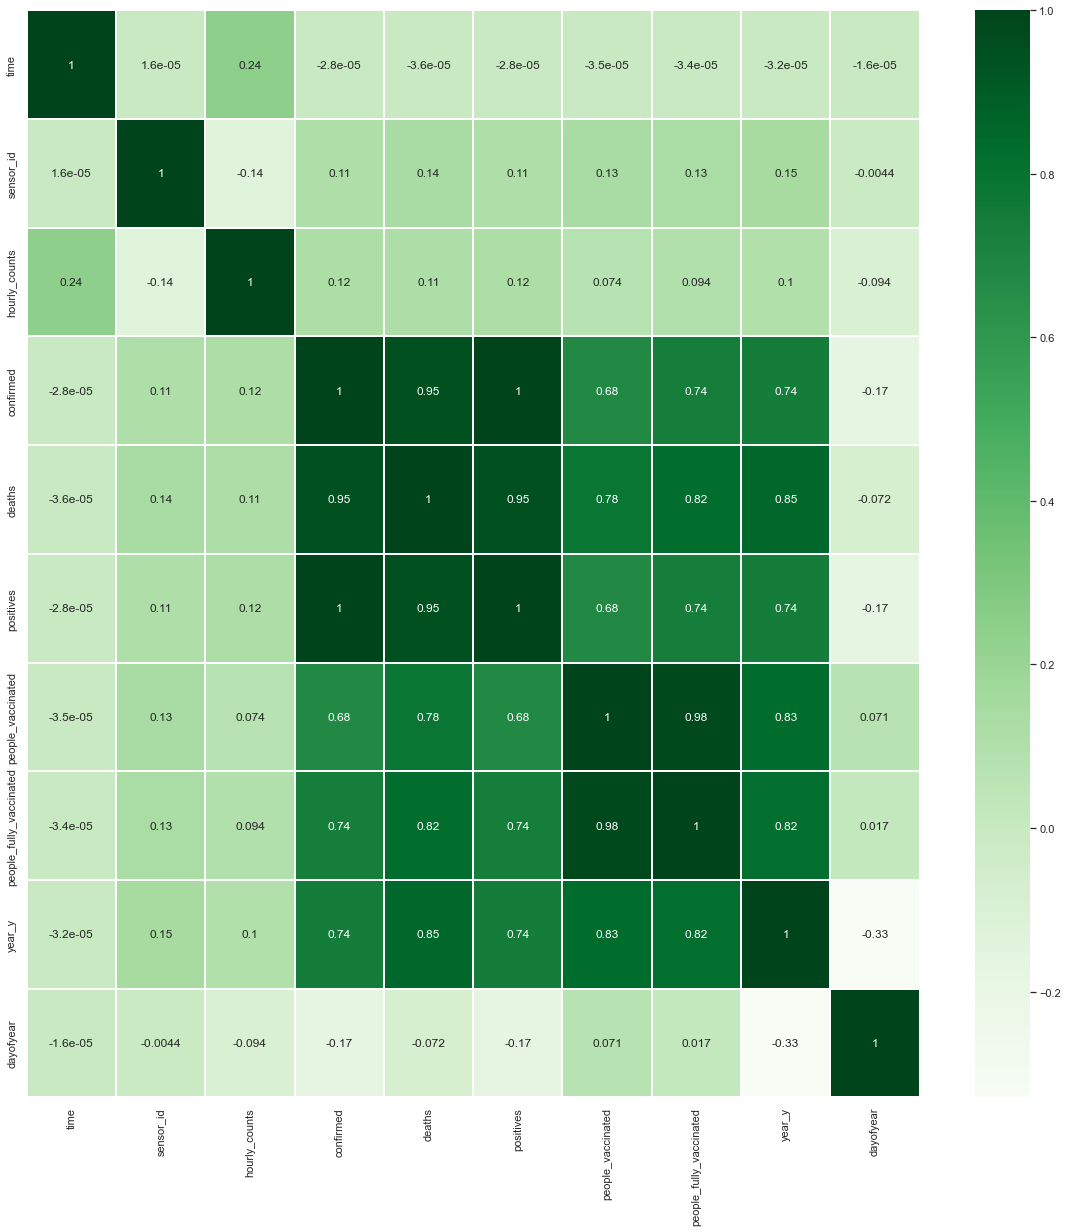


Insignificant features
people_vaccinated          0.073744
people_fully_vaccinated    0.093593
dayofyear                  0.093536
Name: hourly_counts, dtype: float64

Significant features
time             0.237281
sensor_id        0.136830
hourly_counts    1.000000
confirmed        0.119163
deaths           0.112719
positives        0.119163
year_y           0.101577
Name: hourly_counts, dtype: float64


In [57]:

#Drop column
sensor_covid_ds = sensor_covid.drop(['latitude','longitude','mdate_y'],axis=1)

#Examine features
#Using Pearson Correlation
plt.figure(figsize=(20,20))

df = sensor_covid_ds.dropna() #remove na's

cor = df.corr(method='pearson')
sns.heatmap(cor,  xticklabels=cor.columns,
            yticklabels=cor.columns,
            annot=True, cmap=plt.cm.Greens, linewidth=0.1)
plt.show()


#Correlation with output variable
cor_target = abs(cor["hourly_counts"])

#Selecting insignificant features, correlation under 0.1
insignificant_features = cor_target[cor_target<0.1]
print("\nInsignificant features")
print(insignificant_features)

#Selecting significant features, correlation over 0.1
significant_features = cor_target[cor_target>=0.1]
print("\nSignificant features")
print(significant_features)


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>References</b>

O'Brien J, et al., 2020, 'Covid 19 in Australia', covid19data.com.au, date retrieved 20 Aug 2022, <https://www.covid19data.com.au/>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Monthly (counts per hour)', City of Melbourne, date retrieved 11 Aug 2022, <https://dev.socrata.com/foundry/data.melbourne.vic.gov.au/b2ak-trbp>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Sensor Locations', City of Melbourne, date retrieved 26 Aug 2022, <https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234>


    

In [59]:
!jupyter nbconvert  eda_compare_pedestrian_traffic_precovid_to_now.ipynb --to html

[NbConvertApp] Converting notebook eda_compare_pedestrian_traffic_precovid_to_now.ipynb to html
[NbConvertApp] Writing 2247268 bytes to eda_compare_pedestrian_traffic_precovid_to_now.html
